In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Features selected: views, title_length, and hour of day 

# Load the dataset
df = pd.read_csv('youtube_trending_all_regions.csv')

# Convert publishedAt to datetime
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

# Add title length and hour of day columns
df['title_length'] = df['title'].apply(len)
df['hour_of_day'] = df['publishedAt'].dt.hour

# Select relevant columns for visualization
summary = df[['views', 'title_length', 'hour_of_day', 'categoryId', 'region']].describe(include='all')
summary


,views,title_length,hour_of_day,categoryId,region
count,5.000000e+02,500.000000,500.00000,500.000000,500
unique,NaN,NaN,NaN,NaN,10
top,NaN,NaN,NaN,NaN,US
freq,NaN,NaN,NaN,NaN,50
mean,1.580217e+06,56.100000,13.43800,18.088000,NaN
std,3.622518e+06,22.564581,5.90694,7.687812,NaN
min,2.450500e+04,9.000000,0.00000,1.000000,NaN
25%,2.492915e+05,37.750000,10.00000,17.000000,NaN
50%,5.202690e+05,52.000000,15.00000,20.000000,NaN
75%,1.378787e+06,72.000000,17.00000,24.000000,NaN


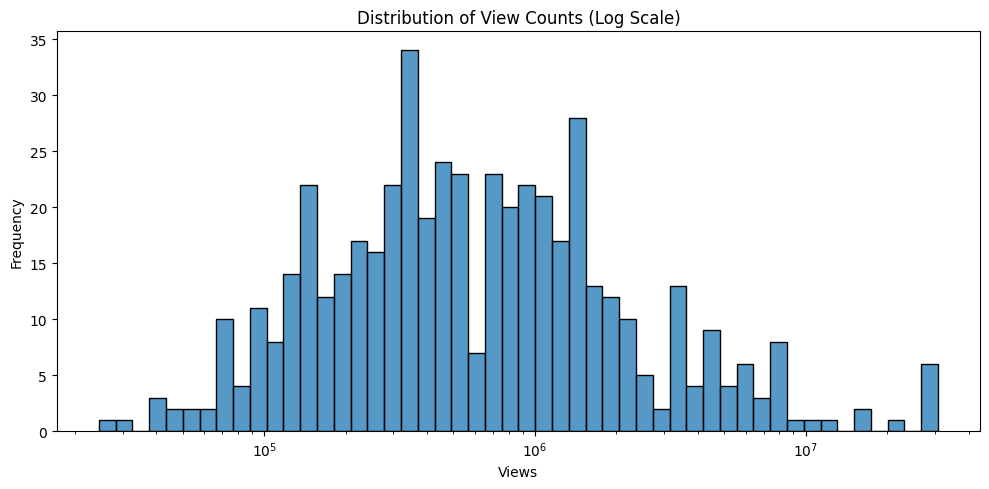

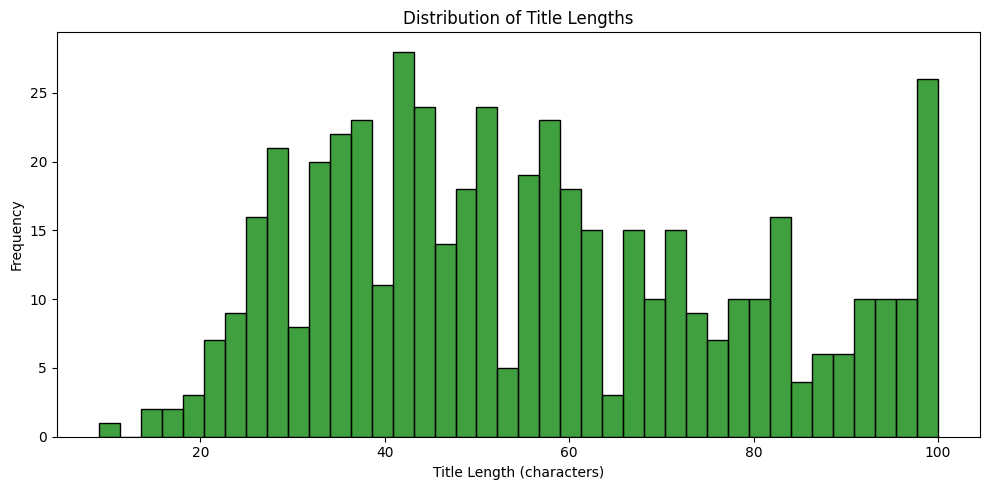

C:\Users\usant\AppData\Local\Temp\ipykernel_42516\3107640034.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour_of_day', data=df, palette='viridis')


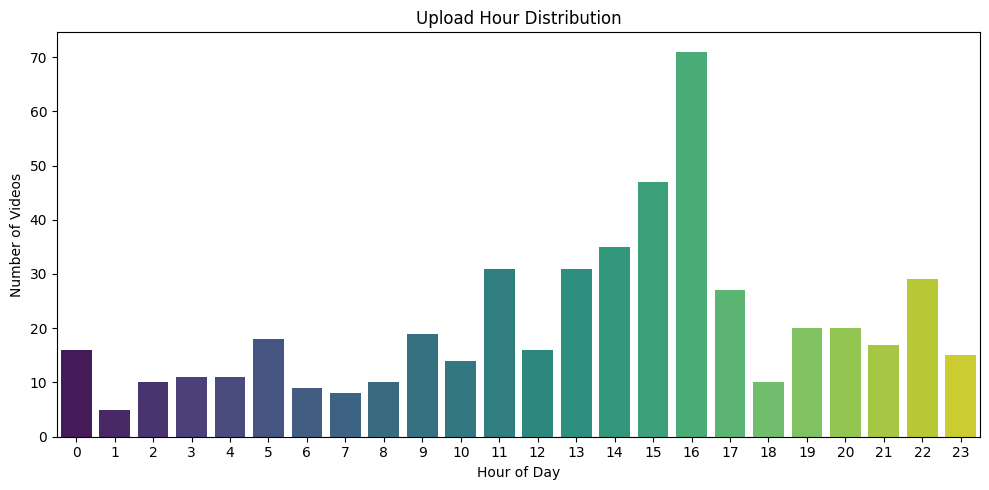

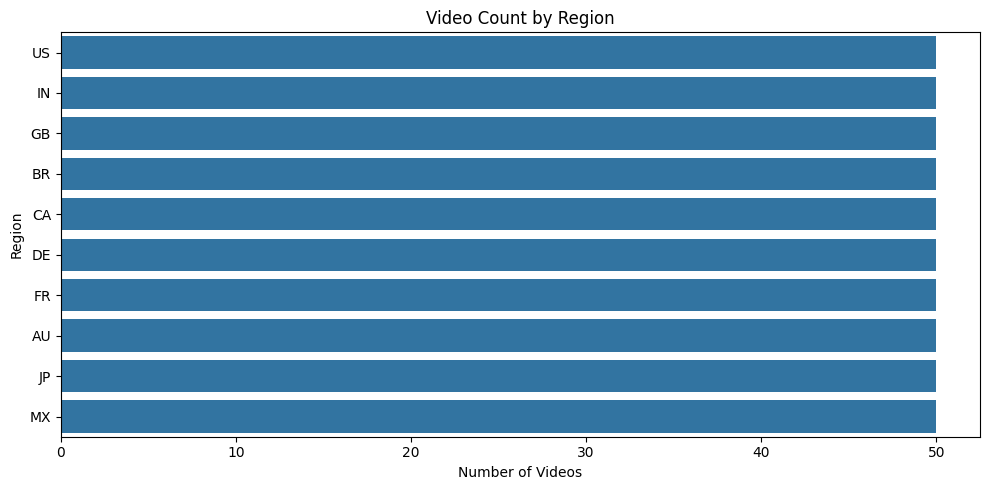

In [5]:
# Plot 1: Distribution of view counts (log scale to handle outliers)
plt.figure(figsize=(10, 5))
sns.histplot(df['views'], bins=50, log_scale=True)
plt.title('Distribution of View Counts (Log Scale)')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot 2: Distribution of title lengths
plt.figure(figsize=(10, 5))
sns.histplot(df['title_length'], bins=40, color='green')
plt.title('Distribution of Title Lengths')
plt.xlabel('Title Length (characters)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot 3: Hour of Day vs Video Count
plt.figure(figsize=(10, 5))
sns.countplot(x='hour_of_day', data=df, palette='viridis')
plt.title('Upload Hour Distribution')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Videos')
plt.tight_layout()
plt.show()

# Plot 4: Region distribution
plt.figure(figsize=(10, 5))
sns.countplot(y='region', data=df, order=df['region'].value_counts().index)
plt.title('Video Count by Region')
plt.xlabel('Number of Videos')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Views vs. Title Length')

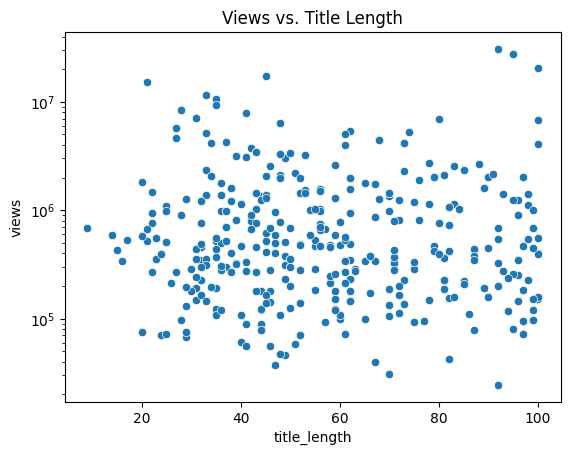

In [9]:
sns.scatterplot(x='title_length', y='views', data=df)
plt.yscale('log')
plt.title('Views vs. Title Length')


Text(0.5, 1.0, 'Views by Region')

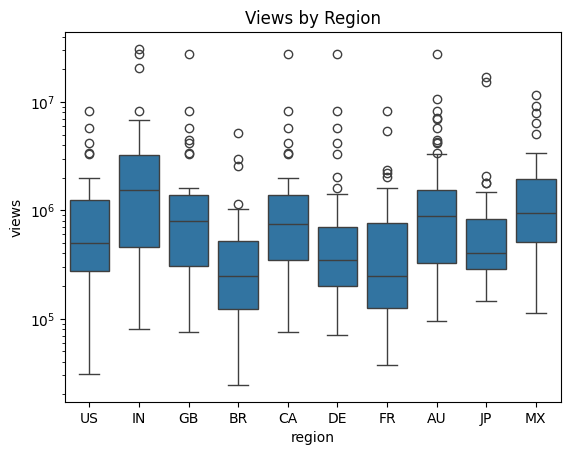

In [11]:
sns.boxplot(x='region', y='views', data=df)
plt.yscale('log')
plt.title('Views by Region')


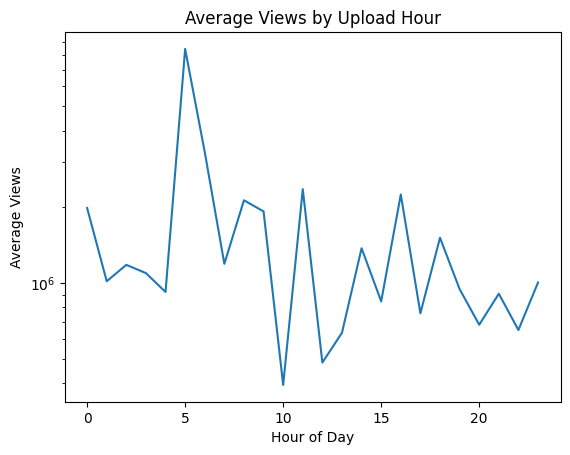

In [13]:
avg_hour_views = df.groupby('hour_of_day')['views'].mean()

sns.lineplot(x=avg_hour_views.index, y=avg_hour_views.values)
plt.title('Average Views by Upload Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Views')
plt.yscale('log')


Text(0.5, 1.0, 'Correlation Between Features')

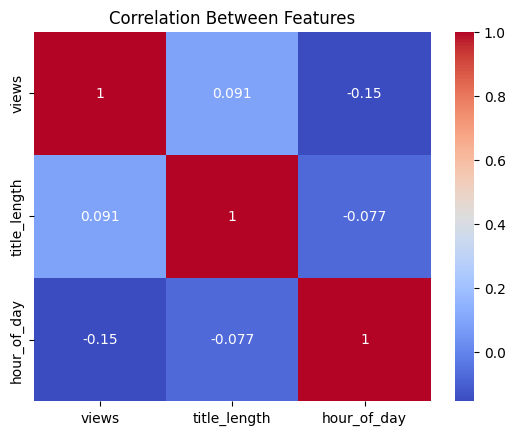

In [15]:
corr = df[['views', 'title_length', 'hour_of_day']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Features')
